<a href="https://colab.research.google.com/github/Emmaculate2020/Fedha-Solutions-Project/blob/master/Fedha_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DEFINING THE ANALYTIC QUESTION

###a). Specifying the analytic question

As a data science team (Fedha Solutions), we have been tasked by MoneyPlus,a Kenyan lending company based in Nairobi, to build a model that can accurately predict the loan interest rate category (either 1, 2, or 3) that will be assigned to each loan.



###b). Defining the metrics of success

Our success will be measured by:

* Creating a predictive model with the highest accuracy and F1 scores without overfitting.
* Providing effective recommendations on groupings of customers according to the loan interest rate categories.

###c). Understanding the Context

MoneyPlus is a Kenyan lending company based in Nairobi that is building up a credit risk system to effectively issue loans. It wants to venture into a risk-based pricing methodology that looks at factors such as a consumer’s credit score, loan amount, annual income, employment status, and tenure.



###d). Recording the Experimental Design

Below is the expected workflow of our Analysis

1.   Data Cleaning and Preparation

2.   Perform EDA

*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis

3.  Spliting dataset into testing and training data.
4.  Build a classification model.
5.  Make predictions using the model.
6.  Assess accuracy of the models.
7.  Make conclusions & Challenge the solution.


###e). Data Relevance

The data provided was relevant to answer the analytic question.

Below is the link to datasets and the descriptions of our datasets columns:

https://docs.google.com/document/d/1ZWyRcQZHlbRz1PoycPMK5aH3vxjg1H7UD90BwCff_do/edit




## Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)
from sklearn.model_selection import train_test_split
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## Load the Dataset

In [ ]:
train = pd.read_csv('/content/train_fNxu4vz.csv')
test = pd.read_csv("/content/test_fjtUOL8.csv")

## Checking the data

In [ ]:
# Preview the first 5 rows of our dataset

train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
test.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [ ]:
# Preview the last 5 rows of our dataset

train.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,"9,250",10+ years,Rent,NaN,VERIFIED - income,credit_card,19.44,1,NaN,5,9,Female,2


In [ ]:
test.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,NaN,10,11,Male
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,NaN,5,6,Male
109540,10273850,"15,000",2 years,Mortgage,137000.0,not verified,medical,8.66,1,60.0,8,17,Male


In [ ]:
# Checking the shape of our data

print("Training dataset shape",train.shape)
print("Testing dataset shape", test.shape)

Training dataset shape (164309, 14)
Testing dataset shape (109541, 13)


Our train dataset has 164309 rows and 14 columns while our test dataset has 109541 rows and 13 columns

In [ ]:
# Checking for infomation about a dataset

print("Train dataset information",train.info())
print("\n")
print("test dataset information",test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [ ]:
# Describing our data

print("Train dataset description",pd.DataFrame(train.describe()))
print("\n")
print("Test dataset description",pd.DataFrame(test.describe()))

Train dataset description             Loan_ID  Annual_Income  Debt_To_Income  Inquiries_Last_6Mo  Months_Since_Deliquency  Number_Open_Accounts  Total_Accounts  Interest_Rate
count  1.643090e+05   1.392070e+05   164309.000000       164309.000000             75930.000000         164309.000000   164309.000000  164309.000000
mean   1.008216e+07   7.333116e+04       17.207189            0.781698                34.229356             11.193818       25.067665       2.158951
std    4.743207e+04   6.037750e+04        7.845083            1.034747                21.761180              4.991813       11.583067       0.738364
min    1.000000e+07   4.000000e+03        0.000000            0.000000                 0.000000              0.000000        2.000000       1.000000
25%    1.004108e+07   4.500000e+04       11.370000            0.000000                16.000000              8.000000       17.000000       2.000000
50%    1.008216e+07   6.300000e+04       16.840000            0.000000          

In [ ]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate'], dtype='object')

In [ ]:
#checking for unique values in the different columns
col = ['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate']

print("Train Dataset")
for i, col in enumerate(col):
        print("\n")
        print(col,train[col].unique())


Train Dataset


Loan_Amount_Requested ['7,000' '30,000' '24,725' ... '28,950' '33,325' '29,825']


Length_Employed ['< 1 year' '4 years' '7 years' '8 years' '2 years' '10+ years' '1 year'
 nan '6 years' '9 years' '3 years' '5 years']


Home_Owner ['Rent' 'Mortgage' nan 'Own' 'Other' 'None']


Annual_Income [68000.      nan 75566.4 ... 51024.  28721.4 24864. ]


Income_Verified ['not verified' 'VERIFIED - income' 'VERIFIED - income source']


Purpose_Of_Loan ['car' 'debt_consolidation' 'credit_card' 'home_improvement'
 'major_purchase' 'other' 'medical' 'small_business' 'moving' 'wedding'
 'vacation' 'house' 'educational' 'renewable_energy']


Debt_To_Income [18.37 14.93 15.88 ... 38.03 39.04 35.06]


Inquiries_Last_6Mo [0 3 1 2 4 5 6 7 8]


Months_Since_Deliquency [ nan  17.  16.  68.  13.   6.  64.  10.  63.  33.  22.  28.   8.  26.
  41.  46.  62.  21.  12.  52.   3.  65.  43.  53.  44.   1.  11.  71.
  23.  15.  48.  39.  30.  32.  18.  24.  47.  66.  19.  76.   4.  29.
  45.  38.  

In [ ]:
cols = ['Loan_Amount_Requested', 'Length_Employed', 'Home_Owner', 'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts', 'Gender']

print("Test Dataset")
for i, cols in enumerate(cols):
        print("\n")
        print(cols, test[cols].unique())


Test Dataset


Loan_Amount_Requested ['27,500' '26,000' '6,075' ... '24,050' '34,425' '29,875']


Length_Employed ['10+ years' '< 1 year' '6 years' '8 years' '1 year' '3 years' '2 years'
 nan '4 years' '7 years' '5 years' '9 years']


Home_Owner ['Mortgage' nan 'Rent' 'Own' 'Other' 'None']


Annual_Income [129000. 110000.  75000. ... 204600.  49680.  74760.]


Income_Verified ['VERIFIED - income' 'not verified' 'VERIFIED - income source']


Purpose_Of_Loan ['debt_consolidation' 'credit_card' 'home_improvement' 'other'
 'small_business' 'vacation' 'wedding' 'major_purchase' 'car' 'house'
 'medical' 'renewable_energy' 'moving' 'educational']


Debt_To_Income [12.87 11.37  6.83 ... 35.86 38.78 38.76]


Inquiries_Last_6Mo [0 2 1 3 6 4 5 7 8]


Months_Since_Deliquency [ 68.  nan  26.  18.  22.  65.  47.  45.  49.  66.  13.  69.  38.  53.
  25.  52.  10.  12.  60.  74.   1.  21.   5.  32.  72.   6.  19.   7.
  20.  17.  44.  55.  37.  58.   8.  15.  30.  33.   9.  75.   3.  29.
  14.  79.  8

## External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## Tidying the Dataset

In [ ]:
# We start by checking for null values in our dataset

train.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [ ]:
# Dealing with null values

test_new = test.copy()
test_new['Months_Since_Deliquency'].fillna(0, inplace = True)
test_new.isnull().sum()

train_new = train.copy()
train_new['Months_Since_Deliquency'].fillna(0, inplace = True)


In [ ]:
# Fill null values in Home_Owner column

train_new['Home_Owner'].fillna("Other", inplace = True)

test_new['Home_Owner'].fillna("Other", inplace = True)


In [ ]:
train_new['Length_Employed'].unique()

train_new['Length_Employed'] = train_new['Length_Employed'].str.strip().str.replace("<", " ")
train_new['Length_Employed'] = train_new['Length_Employed'].str.strip().str.replace("+", " ")
train_new['Length_Employed'] = train_new['Length_Employed'].str.strip().str.replace(" year", " ")
train_new['Length_Employed'] = train_new['Length_Employed'].str.strip().str.replace("years", " ")
train_new['Length_Employed'] = train_new['Length_Employed'].str.strip().str.replace("s", " ")

test_new['Length_Employed'] = test_new['Length_Employed'].str.strip().str.replace("<", " ")
test_new['Length_Employed'] = test_new['Length_Employed'].str.strip().str.replace("+", " ")
test_new['Length_Employed'] = test_new['Length_Employed'].str.strip().str.replace(" year", " ")
test_new['Length_Employed'] = test_new['Length_Employed'].str.strip().str.replace("years", " ")
test_new['Length_Employed'] = test_new['Length_Employed'].str.strip().str.replace("s", " ")

test_new['Length_Employed'] = test_new['Length_Employed'].astype("float32")
train_new['Length_Employed'] = train_new['Length_Employed'].astype("float32")

print(test_new['Length_Employed'].unique())
print(train_new['Length_Employed'].unique())

[10.  1.  6.  8.  3.  2. nan  4.  7.  5.  9.]
[ 1.  4.  7.  8.  2. 10. nan  6.  9.  3.  5.]


In [ ]:
# Dealing with null values in the Annual income column

train_new['Length_Employed'].fillna(0, inplace = True)

element = [0,1,2,3,4,5,6,7,8,9,10]

for i, j in enumerate(element):
  print(j,train_new[train_new['Length_Employed']== j]['Annual_Income'].mean())

print("\n")  
print("Test results")
test_new['Length_Employed'].fillna(0, inplace = True)
for i, j in enumerate(element):
  print(j,test_new[test_new['Length_Employed']== j]['Annual_Income'].mean())
  

def  train_income(cols):
    Annual_Income = cols[0]
    Length_Employed = cols[1]
    
    if pd.isnull(Annual_Income):
        if Length_Employed == 0:
            return 49509
        elif Length_Employed == 1:
            return 68498

        elif Length_Employed == 2:
            return 70833
        elif Length_Employed == 3:
            return 72395
        elif Length_Employed == 4:
            return 71151  
        elif Length_Employed == 5:
            return 71705
        elif Length_Employed == 6:
            return 72043
        elif Length_Employed == 7:
            return 72690
        elif Length_Employed == 8:
            return 74645
        elif Length_Employed == 9:
            return 73860      
        else:
            return  80509
    else:
        return Annual_Income

def  test_income(cols):
    Annual_Income = cols[0]
    Length_Employed = cols[1]
    
    if pd.isnull(Annual_Income):
        if Length_Employed == 0:
            return 49569
        elif Length_Employed == 1:
            return 68524

        elif Length_Employed == 2:
            return 71765
        elif Length_Employed == 3:
            return 71291
        elif Length_Employed == 4:
            return 71135  
        elif Length_Employed == 5:
            return 73856
        elif Length_Employed == 6:
            return 72447
        elif Length_Employed == 7:
            return 74211
        elif Length_Employed == 8:
            return 74656
        elif Length_Employed == 9:
            return 76057      
        else:
            return 79922
    else:
        return Annual_Income

train_new['Annual_Income'] = train_new[['Annual_Income', 'Length_Employed']].apply(train_income, axis=1)
test_new['Annual_Income'] = test_new[['Annual_Income', 'Length_Employed']].apply(test_income, axis=1)
print(train_new.isnull().sum())
print(test_new.isnull().sum())

0 49508.85691051709
1 68498.06379982737
2 70832.59065371595
3 72395.39474922491
4 71150.5575204425
5 71704.91774737304
6 72043.15529464862
7 72690.15270495953
8 74645.17463132607
9 73860.31717141239
10 80509.44206661904


Test results
0 49568.652420852195
1 68524.37441994545
2 71765.34031113802
3 71291.29817815451
4 71135.61014585556
5 73856.09360195757
6 72447.41645392748
7 74211.70622107477
8 74656.08695019332
9 76057.10163179917
10 79922.4581198983
Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64
Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_In

In [ ]:
# Remove White Spaces 

train_new.columns = train_new.columns.str.strip().str.replace("", "").str.lower()
test_new.columns = test_new.columns.str.strip().str.replace("", "").str.lower()

category = ["home_owner", "income_verified", "purpose_of_loan", "gender"]

for i, c in enumerate(category):
  train_new[c] = train_new[c].str.strip().str.replace("", "").str.lower()
  
for i, c in enumerate(category):
  test_new[c] = test_new[c].str.strip().str.replace("", "").str.lower()


In [ ]:
# Convert loan requested to float
train_new['loan_amount_requested'] = train_new['loan_amount_requested'] .str.strip().str.replace(",", " ").str.replace(" ","")
train_new['loan_amount_requested'] = train_new['loan_amount_requested'] .astype("float32")

test_new['loan_amount_requested'] = test_new['loan_amount_requested'] .str.strip().str.replace(",", " ").str.replace(" ","")
test_new['loan_amount_requested'] = test_new['loan_amount_requested'] .astype("float32")

In [ ]:
# Remove Duplicates

train_new.drop_duplicates()
test_new.drop_duplicates()
print("Train duplicates :", train_new.duplicated().sum())
print("Test duplicates :", test_new.duplicated().sum())


Train duplicates : 0
Test duplicates : 0


In [ ]:
# Loan ID column
train_new.drop("loan_id", axis= 1, inplace = True)
test_new.drop("loan_id", axis= 1, inplace = True)
train_new.columns

Index(['loan_amount_requested', 'length_employed', 'home_owner', 'annual_income', 'income_verified', 'purpose_of_loan', 'debt_to_income', 'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts', 'total_accounts', 'gender', 'interest_rate'], dtype='object')

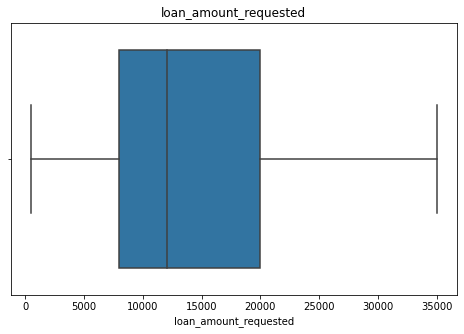

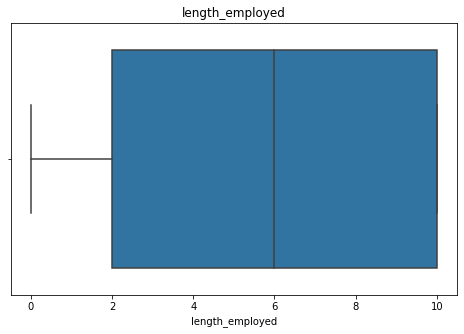

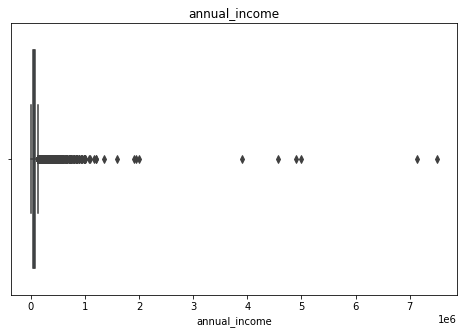

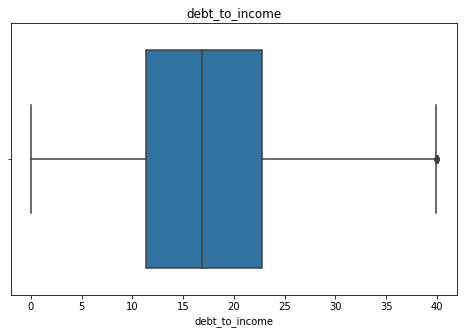

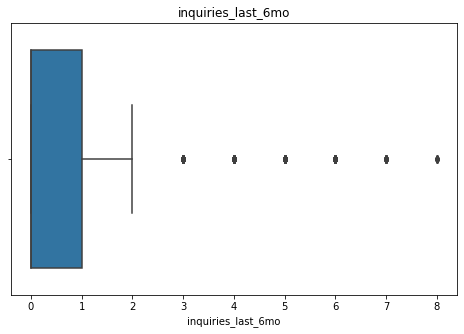

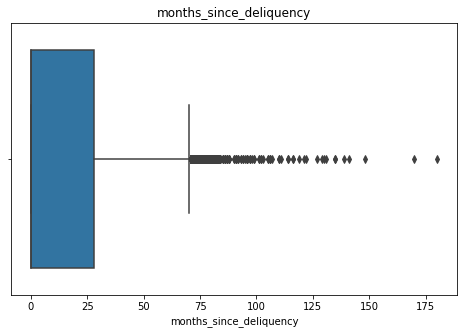

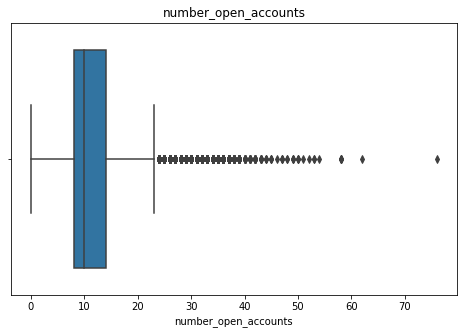

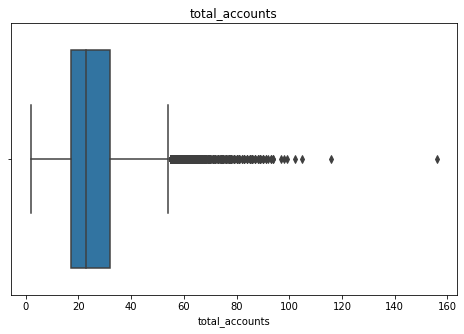

In [ ]:
# Check for outliers for train dataset using Boxplots

columns = ['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']

for i, j in enumerate(columns):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(train_new[j])

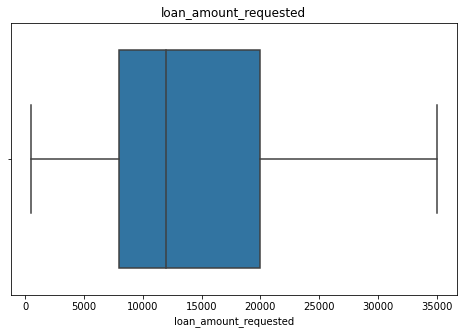

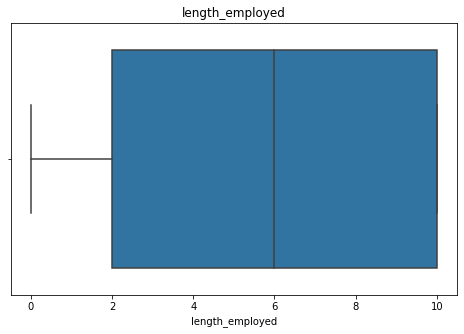

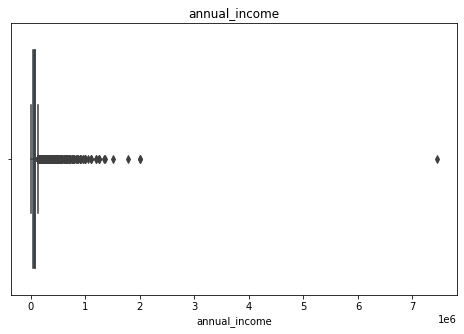

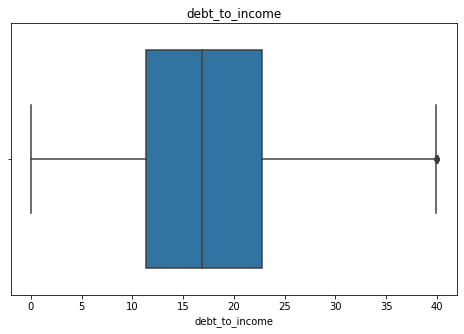

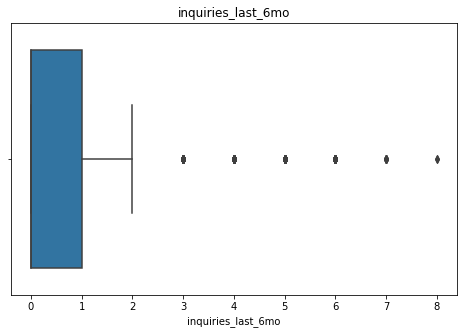

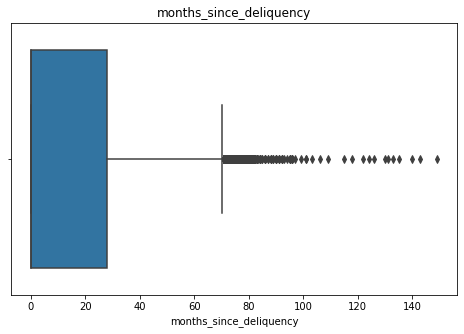

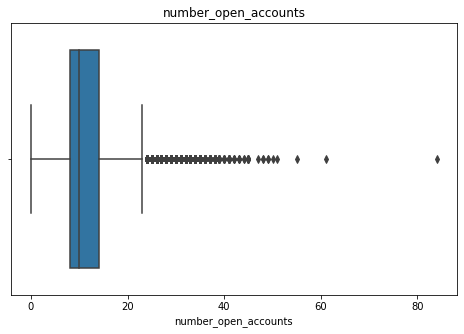

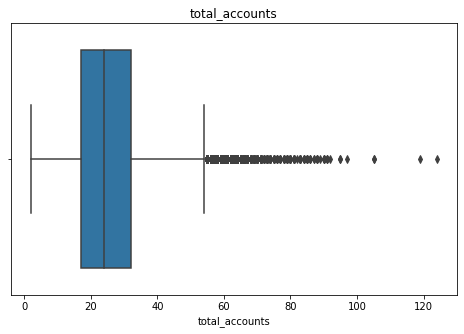

In [ ]:
# Check for outliers for test dataset using Boxplots

columns = ['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']

for i, j in enumerate(columns):
  plt.figure(figsize=(8,5))
  plt.title(j)
  sns.boxplot(test_new[j])

In [ ]:
# Remove Outliers in Train Numerical Values

columns = train_new[['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
train_num = train_new[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {train_new.shape}")
print(f"New dataframe size: {train_num.shape}")


[[0.8874035  1.31707104 0.09586651 ... 0.70038831 0.43948447 0.95550677]
 [1.88975596 0.4942916  0.03923279 ... 0.05233789 0.16150137 0.09217493]
 [1.25282047 0.32848784 0.04012631 ... 0.70038831 0.16150137 0.7828404 ]
 ...
 [0.71248184 1.15126728 0.12896091 ... 0.70038831 1.16314444 0.42582417]
 [0.52516531 0.4942916  0.03923279 ... 1.42495626 0.96281582 3.18848604]
 [0.61572486 1.15126728 0.12896091 ... 0.70038831 1.24079892 1.38717269]]
Previous dataframe size : (164309, 13)
New dataframe size: (156949, 13)


In [ ]:
# Remove Outliers in Test Numerical Values

columns = test_new[['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
test_num = test_new[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {test_new.shape}")
print(f"New dataframe size: {test_num.shape}")



[[1.58335939 1.14857049 1.08344154 ... 2.32890895 0.2374176  1.02861949]
 [1.40263157 1.14857049 0.7125818  ... 0.69862668 1.04610434 0.17832017]
 [0.99803625 1.32211538 0.02941912 ... 0.69862668 1.24827602 0.4369501 ]
 ...
 [1.48901348 0.22403277 0.69570926 ... 0.69862668 0.2374176  1.21283989]
 [1.47395283 0.05048788 0.84893289 ... 0.69862668 1.24827602 1.64388977]
 [0.07729426 1.04759473 1.23959301 ... 1.97272829 0.64176097 0.69558003]]
Previous dataframe size : (109541, 12)
New dataframe size: (104341, 12)


In [ ]:
# Export the cleaned dataset

test_num.to_csv('test_clean.csv')
train_num.to_csv('train_clean.csv')


In [ ]:
#renaming our dataset 
df = train_num.copy()
df.head(3)

,loan_amount_requested,length_employed,home_owner,annual_income,income_verified,purpose_of_loan,debt_to_income,inquiries_last_6mo,months_since_deliquency,number_open_accounts,total_accounts,gender,interest_rate
0,7000.0,1.0,rent,68000.0,not verified,car,18.37,0,0.0,9,14,female,1
1,30000.0,4.0,mortgage,71151.0,verified - income,debt_consolidation,14.93,0,17.0,12,24,female,3
2,24725.0,7.0,mortgage,75566.4,verified - income source,debt_consolidation,15.88,0,0.0,12,16,male,3


##Exploratory Data Analysis

###Univariate Anaysis

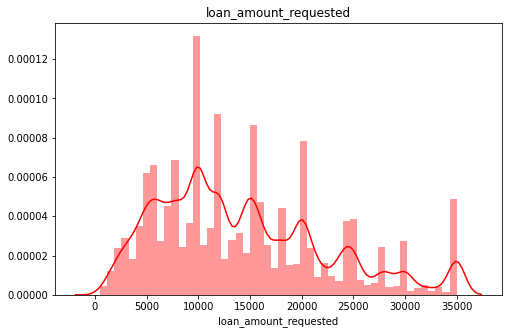

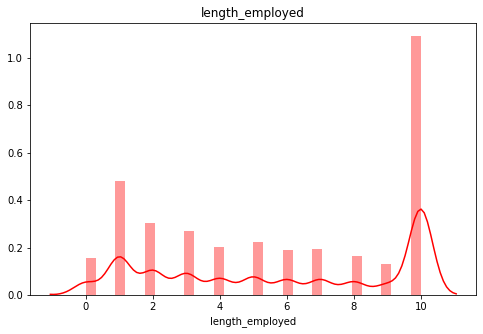

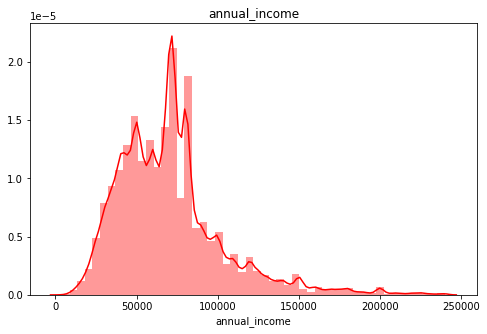

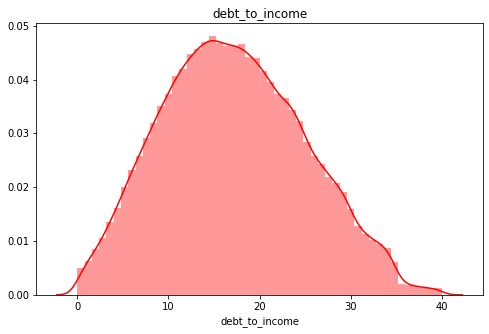

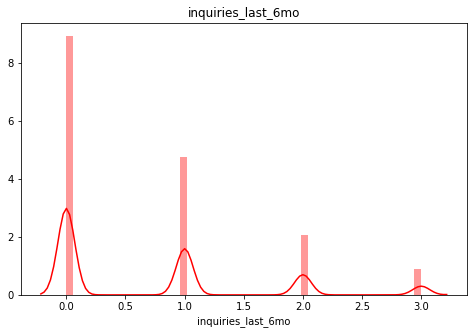

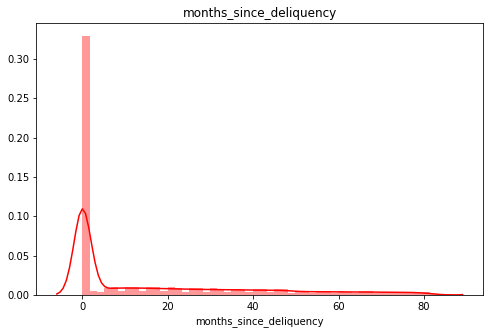

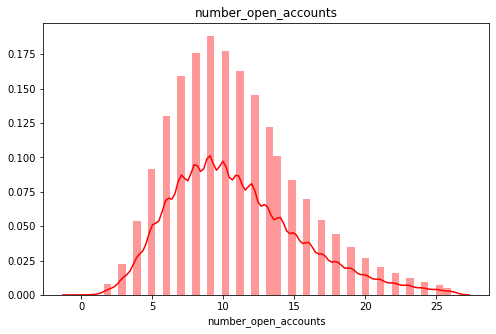

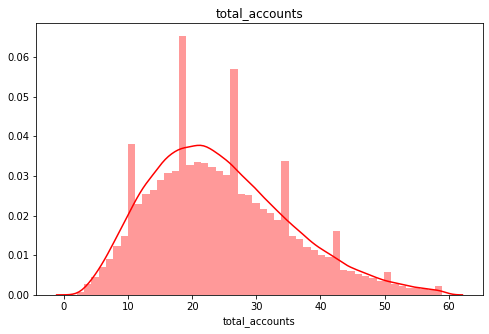

In [ ]:
# Plot histogram for numerical values
num_cols = ['loan_amount_requested', 'length_employed', 'annual_income', 'debt_to_income',
           'inquiries_last_6mo', 'months_since_deliquency', 'number_open_accounts','total_accounts']
           
for i, j in enumerate(num_cols):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.distplot(df[j], color='red', norm_hist=True)



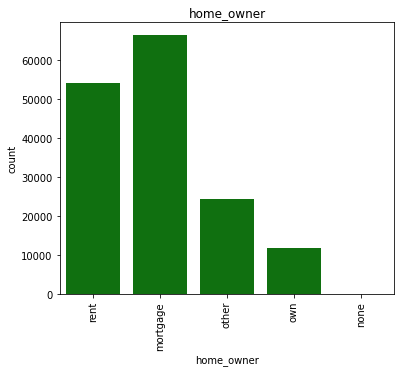

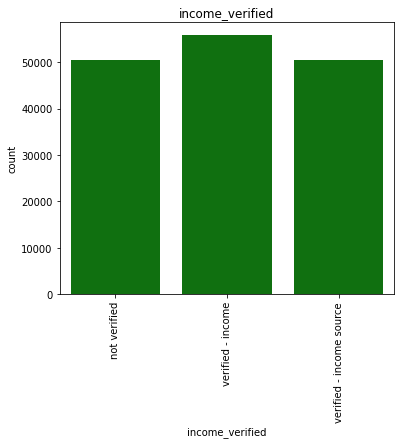

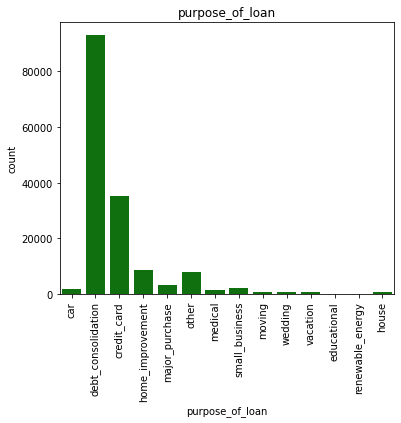

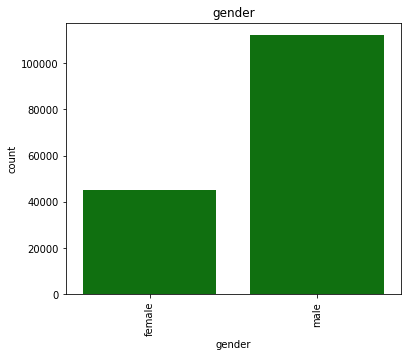

In [ ]:
#Countplot for categorical values

Categorical = ['home_owner','income_verified','purpose_of_loan','gender']

for i,c in enumerate(Categorical):
  
  plt.figure(figsize=(6,5))
  plt.title(c)
  sns.countplot(df[c], color='green')
  plt.xticks(rotation = 90)


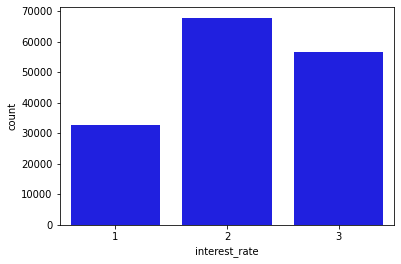

In [ ]:
#Visualize our target variable using countplot
sns.countplot(df['interest_rate'], color='blue')

In [ ]:
df.dtypes

loan_amount_requested      float32
length_employed            float32
home_owner                  object
annual_income              float64
income_verified             object
purpose_of_loan             object
debt_to_income             float64
inquiries_last_6mo           int64
months_since_deliquency    float64
number_open_accounts         int64
total_accounts               int64
gender                      object
interest_rate                int64
dtype: object

##Bivariate Analysis

In [ ]:
strat_output = df.groupby('interest_rate', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(20000))

# proportion of the non_stratified sample
print(strat_output['interest_rate'].value_counts())


3    20000
2    20000
1    20000
Name: interest_rate, dtype: int64


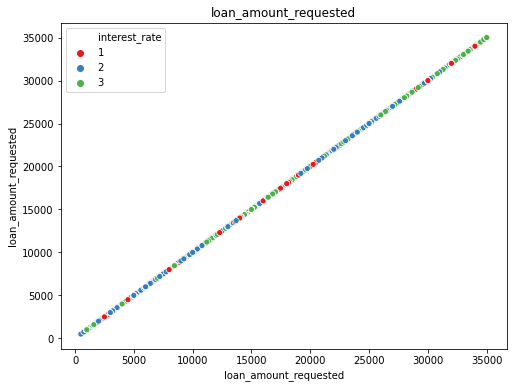

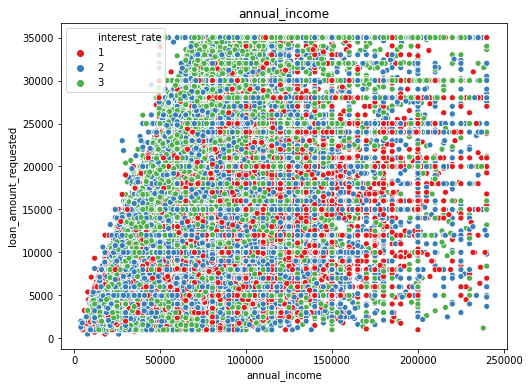

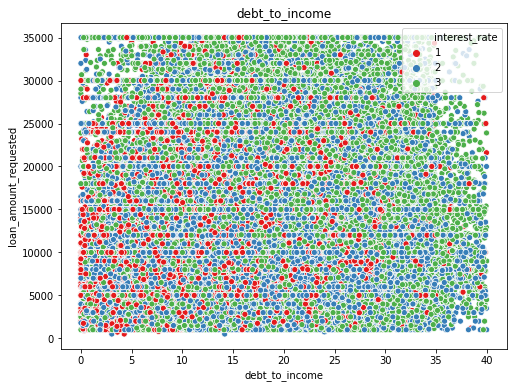

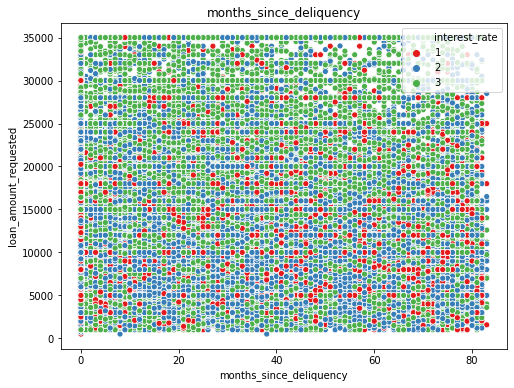

In [ ]:
#Plotting for numerical columns
num_col = ['loan_amount_requested', 'annual_income', 'debt_to_income','months_since_deliquency']
for i, j in enumerate(num_col):
  plt.figure(figsize=(8,6))
  plt.title(j)
  sns.scatterplot(j,'loan_amount_requested', data = df,hue = 'interest_rate', palette = 'Set1')



####Categorical countplot to r/ship btwn and target variable

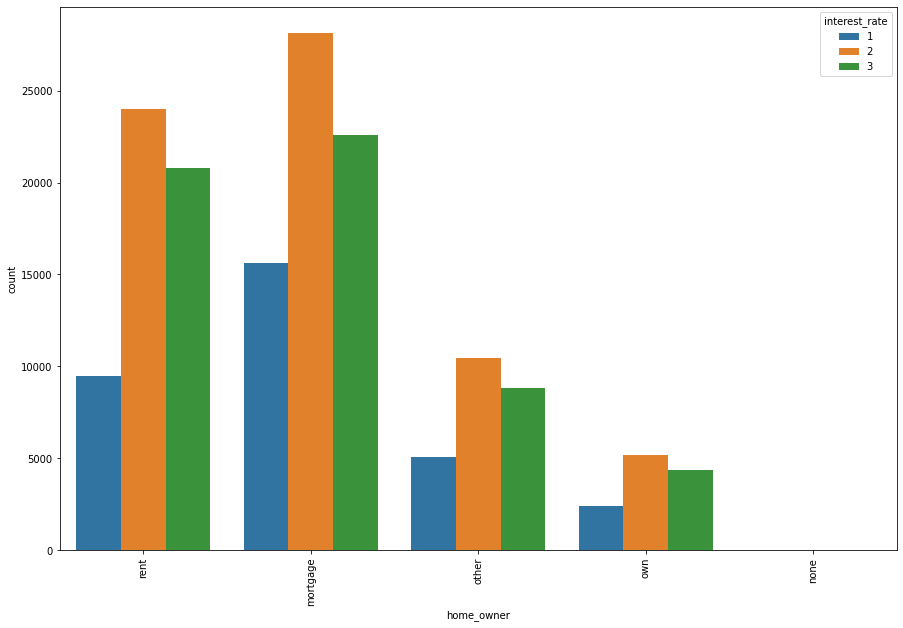

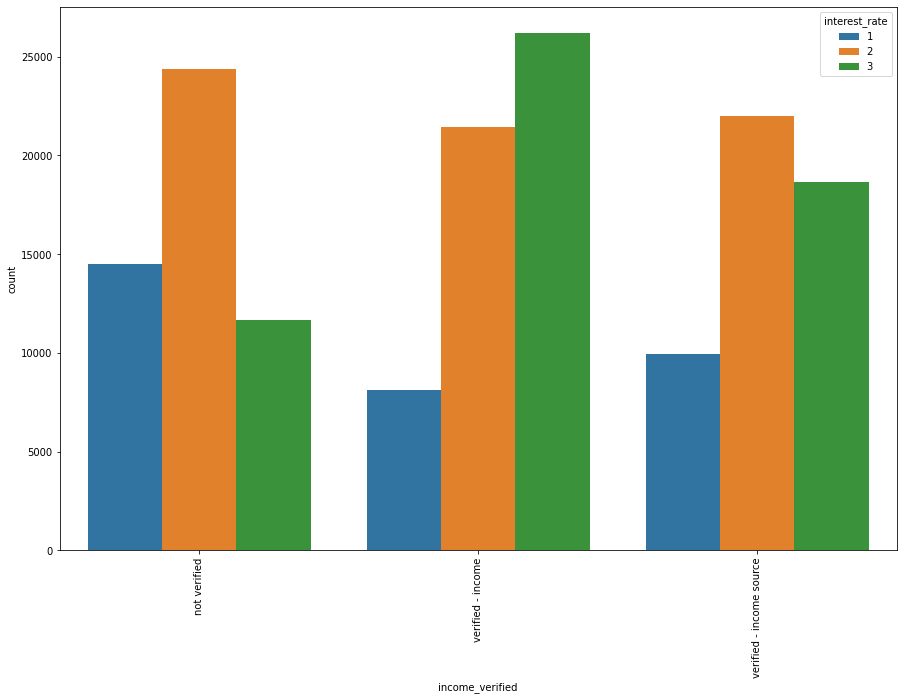

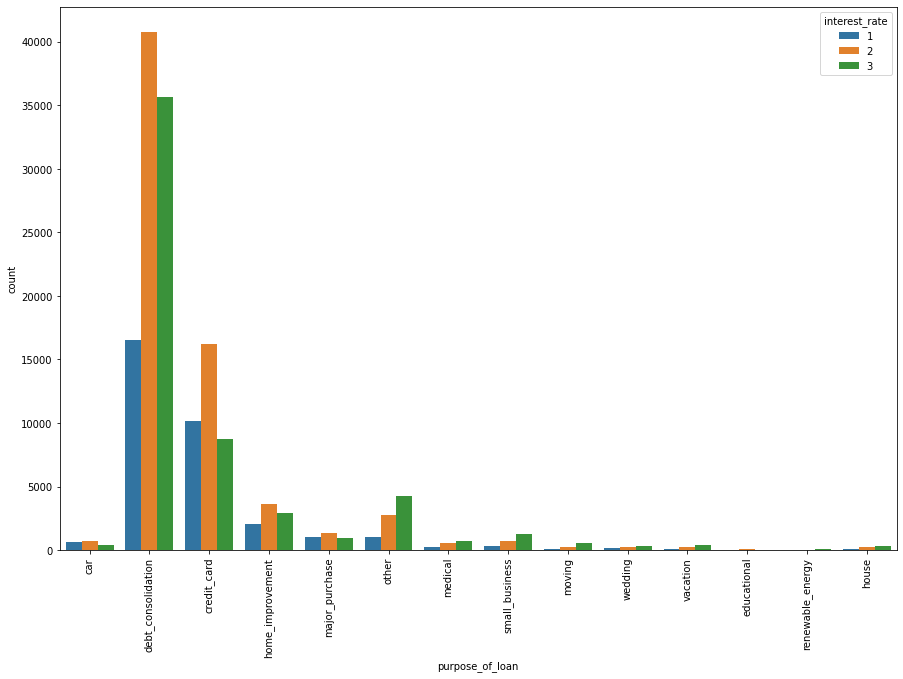

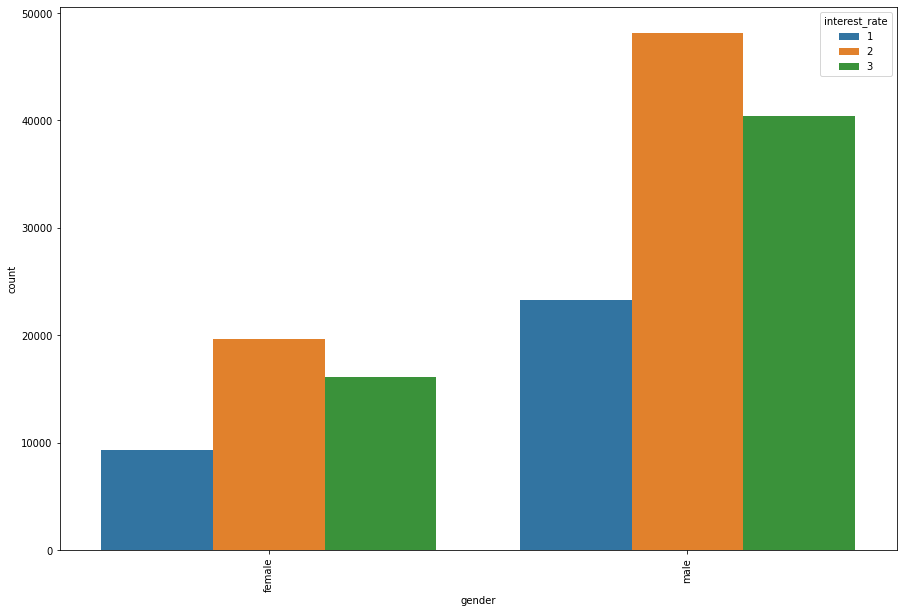

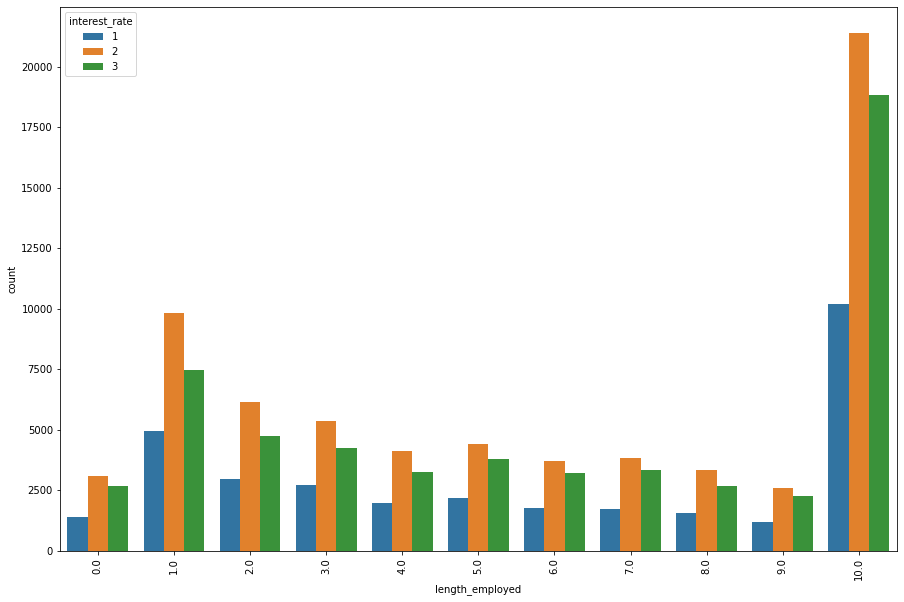

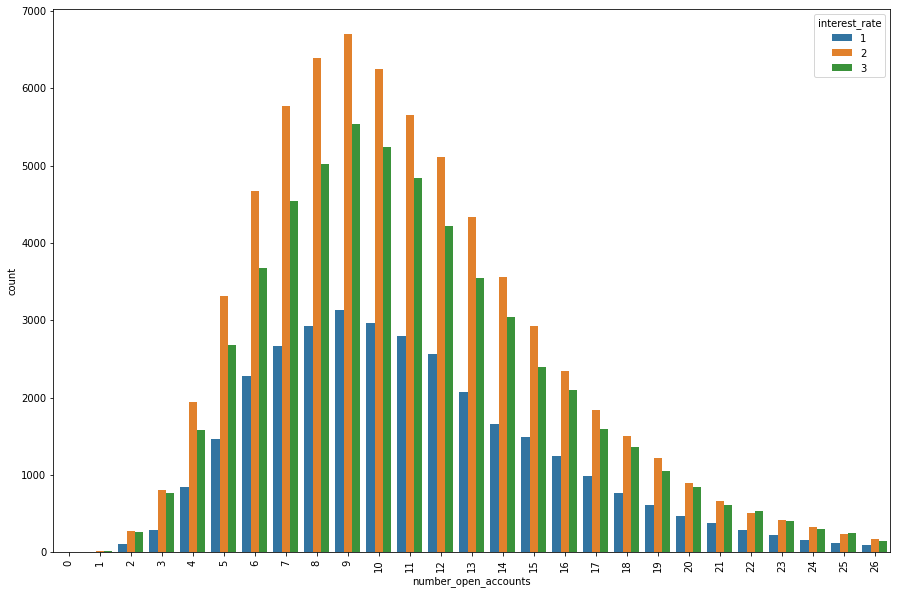

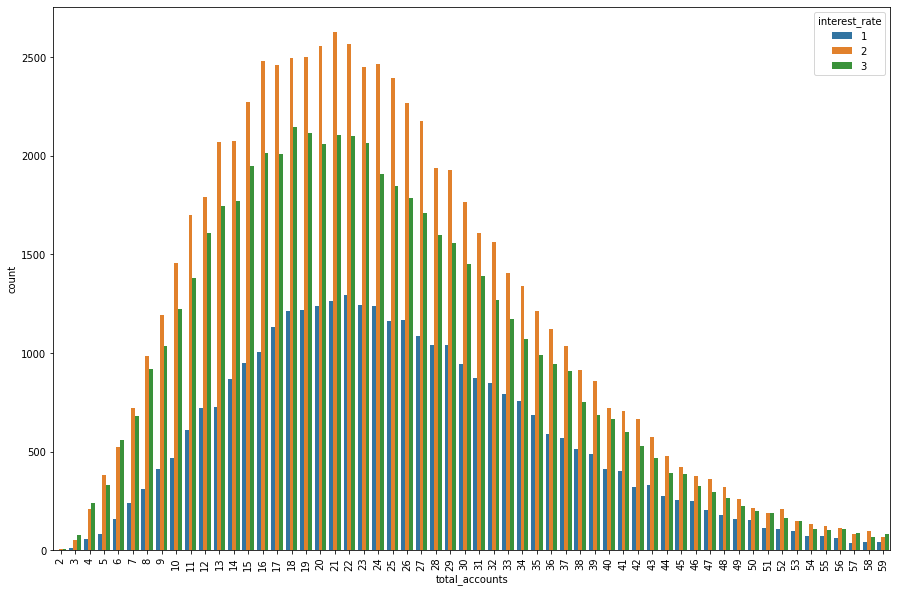

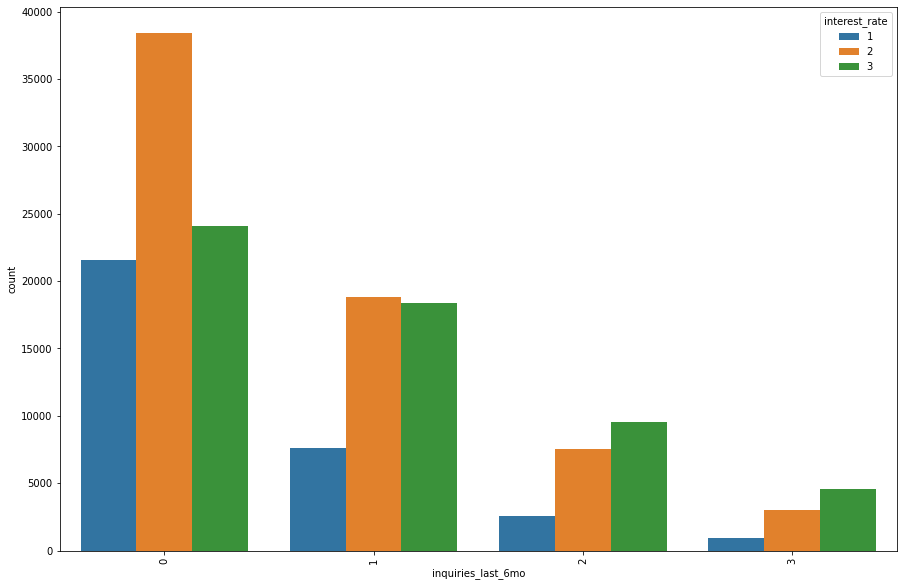

In [ ]:
Categorical = ['home_owner','income_verified','purpose_of_loan','gender',
               'length_employed','number_open_accounts','total_accounts','inquiries_last_6mo']
for i,c in enumerate(Categorical):
  plt.figure(figsize = (15,10))
  sns.countplot(c, hue= 'interest_rate', data=df)
  plt.xticks(rotation = 90)


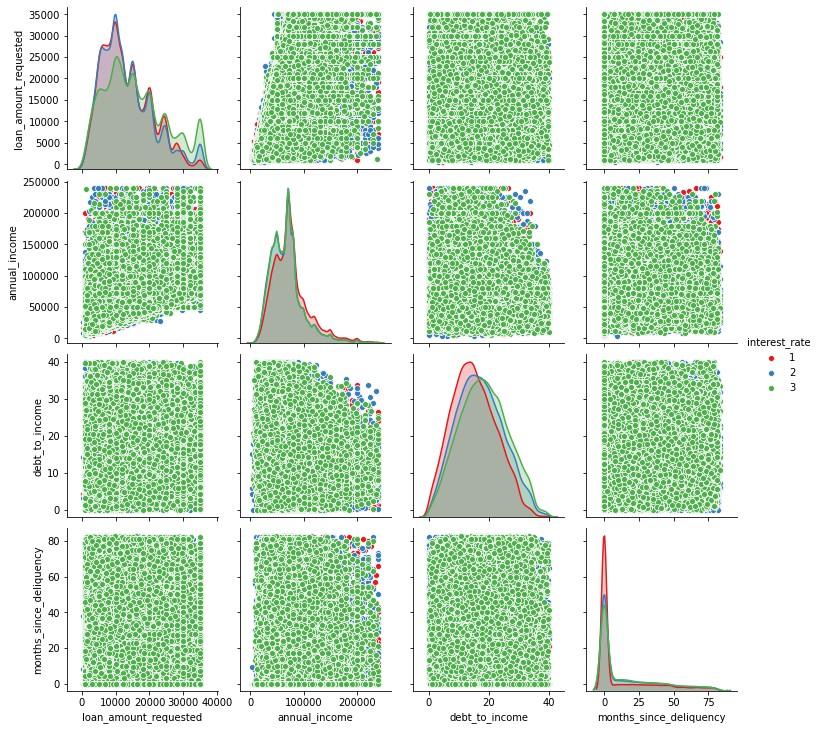

In [ ]:
#

num = df[['loan_amount_requested', 'annual_income', 'debt_to_income','months_since_deliquency','interest_rate']]
sns.pairplot(num, hue= 'interest_rate', palette= 'Set1')

In [ ]:
# Change categorical data to numerical data so I can create a correlation matrix.
le = LabelEncoder()
for i, cc in enumerate(Categorical):
  df[cc] = le.fit_transform(df[cc])


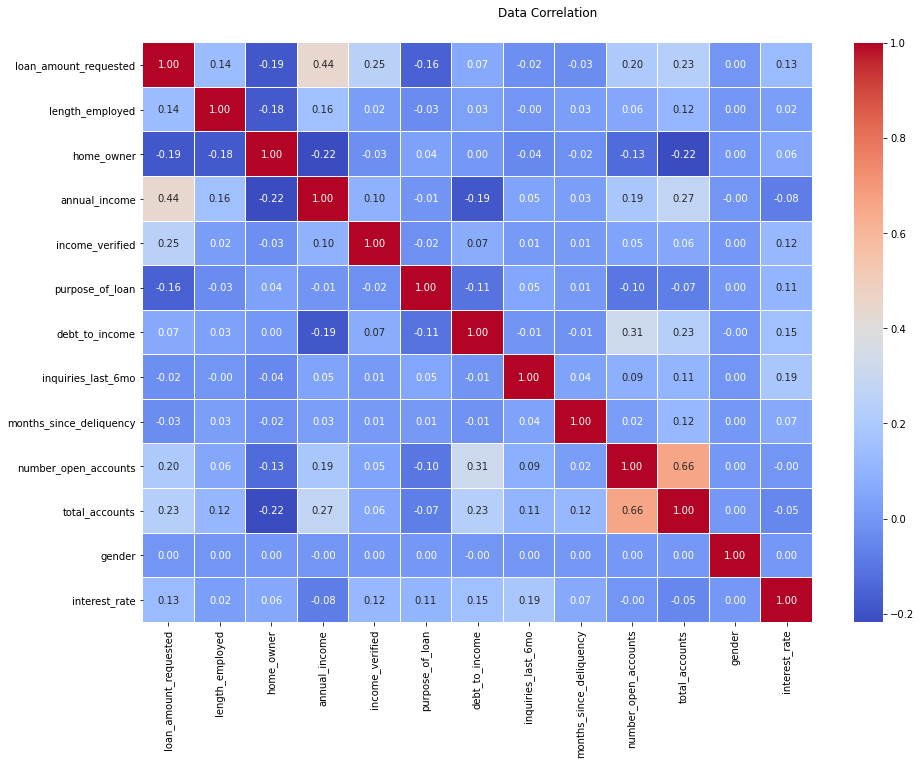

In [ ]:
# create a corelation matrix

cor = f , ax = plt.subplots(figsize = (15,10))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle('Data Correlation')


###Multivariate Analysis

explained_variance_ratio_ =  [0.19332949 0.11837408 0.09817645 0.08693001 0.08328644 0.0821401
 0.07783378 0.07555739 0.0665054  0.05341323 0.03747342 0.02698021]


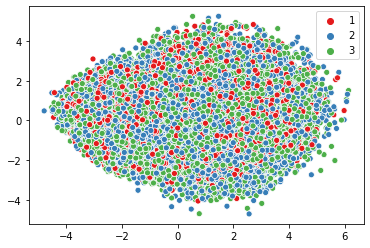

In [ ]:
# We start by dividing our dataset into Features and Targets

y = df.iloc[: ,-1].values
X = df.iloc[:,  : -1].values

# Split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Standarsize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

#  Import LDA and feat our data

from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
x_pca = pca.fit_transform(X_train, y_train)

# Check the variance ratio
print('explained_variance_ratio_ = ' , pca.explained_variance_ratio_)

# plot our PDA graph

sns.scatterplot(x_pca[:,0], x_pca[:, 1], hue=y_train.flatten(), palette='Set1', alpha = 1)

